In [1]:
%matplotlib inline


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import SimpleITK as sitk
from pathlib import Path


/Users/naimsassine/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
t2_train_table = pd.read_csv('E:/Memoire/ProstateX/generated/train/dataframes/training_meta_data.csv')


In [4]:
t2_significant_findings = t2_train_table[t2_train_table.ClinSig == True]

In [5]:
t2_train_table

Unnamed: 0          ProxID            DCMSerDescr  \
0             0  ProstateX-0000             t2_tse_tra   
1             1  ProstateX-0001             t2_tse_tra   
2             3  ProstateX-0002             t2_tse_tra   
3             4  ProstateX-0002             t2_tse_tra   
4             5  ProstateX-0003             t2_tse_tra   
..          ...             ...                    ...   
375         411  ProstateX-0067  ProstateX-0067-ktrans   
376         412  ProstateX-0067  ProstateX-0067-ktrans   
377         413  ProstateX-0068  ProstateX-0068-ktrans   
378         414  ProstateX-0068  ProstateX-0068-ktrans   
379         415  ProstateX-0068  ProstateX-0068-ktrans   

                                       resampled_nifti sequence_type  fid  \
0    E:/Memoire/ProstateX/generated/tra...            t2    1   
1    E:/Memoire/ProstateX/generated/tra...            t2    1   
2    E:/Memoire/ProstateX/generated/tra...            t2    2   
3    E:/Memoire/ProstateX/generated/tra...            t2    1   
4    E:/Memoire/ProstateX/generated/tra...            t2    1   
..                                                 ...           ...  ...   
375  E:/Memoire/ProstateX/generated/tra...        ktrans    2   
376  E:/Memoire/ProstateX/generated/tra...        ktrans    3   
377  E:/Memoire/ProstateX/generated/tra...        ktrans    1   
378  E:/Memoire/ProstateX/generated/tra...        ktrans    2   
379  E:/Memoire/ProstateX/generated/tra...        ktrans    3   

                                                   pos             ijk zone  \
0                          (25.7457, 31.8707, -38.511)   (167, 224, 9)   PZ   
1    (-40.5367071921656, 29.320722668457, -16.70766...  (157, 186, 10)   AS   
2                          (-2.058, 38.6752, -34.6104)  (203, 216, 10)   PZ   
3                        (-27.0102, 41.5467, -26.0469)  (154, 217, 12)   PZ   
4                         (22.1495, 31.2717, -2.45933)  (240, 205, 12)   TZ   
..                                                 ...             ...  ...   
375                        (27.2983, 36.0017, 16.8409)     (74, 65, 7)   PZ   
376                       (-11.5378, 44.1525, 22.7649)     (48, 70, 9)   PZ   
377                      (-8.98097, 42.0751, -9.31191)     (70, 77, 7)   PZ   
378                       (-22.0582, 39.112, -11.8622)     (61, 75, 6)   PZ   
379                         (-32.9206, 11.02, 7.73917)    (54, 54, 11)   TZ   

     ClinSig  
0       True  
1      False  
2      False  
3       True  
4      False  
..       ...  
375    False  
376    False  
377    False  
378    False  
379    False  

[380 rows x 10 columns]

In [6]:
t2_case = t2_train_table.iloc[5]
adc = t2_train_table.iloc[100]
bval = t2_train_table.iloc[192]
ktrans = t2_train_table.iloc[287]

print(t2_case, adc, bval, ktrans)

Unnamed: 0                                                         6
ProxID                                                ProstateX-0003
DCMSerDescr                                               t2_tse_tra
resampled_nifti    E:/Memoire/ProstateX/generated/tra...
sequence_type                                                     t2
fid                                                                2
pos                                     (-21.2871, 19.3995, 19.7429)
ijk                                                   (153, 161, 17)
zone                                                              TZ
ClinSig                                                        False
Name: 5, dtype: object Unnamed: 0                                                       117
ProxID                                                ProstateX-0003
DCMSerDescr                                ep2d_diff_tra_dyndist_adc
resampled_nifti    E:/Memoire/ProstateX/generated/tra...
sequence_type                      

Spacings
(0.5, 0.5, 3.0)
(2.0, 2.0, 3.0)
(2.0, 2.0, 3.0)
(1.5, 1.5, 4.0)
Arrays shape
(21, 384, 384)
(19, 128, 84)
(19, 128, 84)
(14, 128, 128)
[-21.2871, 19.3995, 19.7429]
Voxels
(153, 222, 16)
(32, 71, 15)
(32, 71, 15)
(51, 54, 12)
153 222 16


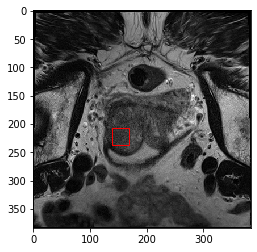

32 71 15


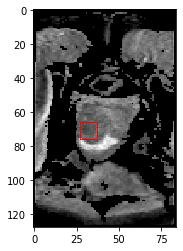

32 71 15


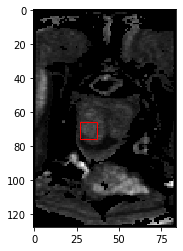

51 54 12


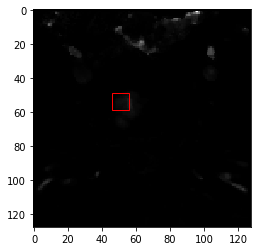

In [7]:
# make sure they are resampled
# import a resampled and a none resampled
# test if the TransformPhysicalPointToIndex will give different results niveau voxels
# if it does then bingo

t2_case_image = sitk.ReadImage(str(t2_case['resampled_nifti']))
adc_image = sitk.ReadImage(str(adc['resampled_nifti']))
bval_image = sitk.ReadImage(str(bval['resampled_nifti']))
ktrans_image = sitk.ReadImage(str(ktrans['resampled_nifti']))


print("Spacings")
print(t2_case_image.GetSpacing())
print(adc_image.GetSpacing())
print(bval_image.GetSpacing())
print(ktrans_image.GetSpacing())



t2_case_array = sitk.GetArrayViewFromImage(t2_case_image)
adc_case_array = sitk.GetArrayViewFromImage(adc_image)
bval_case_array = sitk.GetArrayViewFromImage(bval_image)
ktrans_case_array = sitk.GetArrayViewFromImage(ktrans_image)

print("Arrays shape")
print(t2_case_array.shape)
print(adc_case_array.shape)
print(bval_case_array.shape)
print(ktrans_case_array.shape)

pos = t2_case['pos']
pos_1 = pos[1:-1]
converted_pos = pos_1.split(",")
pos = [float(i) for i in converted_pos]
print(pos)

t2_cancer_loc = t2_case_image.TransformPhysicalPointToIndex(pos)
adc_cancer_loc = adc_image.TransformPhysicalPointToIndex(pos)
bval_cancer_loc = bval_image.TransformPhysicalPointToIndex(pos)
ktrans_cancer_loc = ktrans_image.TransformPhysicalPointToIndex(pos)


print("Voxels")
print(t2_cancer_loc)
print(adc_cancer_loc)
print(bval_cancer_loc)
print(ktrans_cancer_loc)


# tests if it gives you the same location on the image!!! if yes, then vraiment c bon

x = t2_cancer_loc[0]
y = t2_cancer_loc[1]
z = t2_cancer_loc[2]
print(x, y, z)
fig,ax = plt.subplots(1)
ax.imshow(t2_case_array[z,:,:], cmap = 'gray') 
rect = patches.Rectangle((x-15,y-15),30,30,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

x_adc = adc_cancer_loc[0]
y_adc = adc_cancer_loc[1]
z_adc = adc_cancer_loc[2]
print(x_adc, y_adc, z_adc)
fig,ax = plt.subplots(1)
ax.imshow(adc_case_array[z_adc,:,:], cmap = 'gray') 
rect = patches.Rectangle((x_adc-5,y_adc-5),10,10,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

x_bval = bval_cancer_loc[0]
y_bval = bval_cancer_loc[1]
z_bval = bval_cancer_loc[2]
print(x_bval, y_bval, z_bval)
fig,ax = plt.subplots(1)
ax.imshow(bval_case_array[z_bval,:,:], cmap = 'gray') 
rect = patches.Rectangle((x_bval-5,y_bval-5),10,10,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

x_ktrans = ktrans_cancer_loc[0]
y_ktrans = ktrans_cancer_loc[1]
z_ktrans = ktrans_cancer_loc[2]
print(x_ktrans, y_ktrans, z_ktrans)
fig,ax = plt.subplots(1)
ax.imshow(ktrans_case_array[z_ktrans,:,:], cmap = 'gray') 
rect = patches.Rectangle((x_ktrans-5,y_ktrans-5),10,10,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

In [70]:
# make sure they are resampled
# import a resampled and a none resampled
# test if the TransformPhysicalPointToIndex will give different results niveau voxels
# if it does then bingo
def dessine(image, pos): 
    print("spacings : ", image.GetSpacing())
    array = sitk.GetArrayViewFromImage(image)
    print("Arrays shape : ", array.shape)
    location = image.TransformPhysicalPointToIndex(pos)
    print("location of the cancer : ", pos)
    print("location in voxels : ", location)
    x = location[0]
    y = location[1]
    z = location[2]
    plt.imshow(array[z,:,:], cmap = 'gray')

    fig,ax = plt.subplots(1)
    ax.imshow(array[z,:,:], cmap = 'gray') 
    rect = patches.Rectangle((x-15,y-15),30,30,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()


In [71]:
# write a code that will generate multiple images with different localisations to see if with reseamplings vs sans resampling is better
# 34, 32, 35, 04, 20, 38, 14, 46
# 49, 46, 50, 6,  26, 55, 20, 68
# is it significant ? + compare their location, the function's location resampled vs non resampled
t2_case = t2_train_table.iloc[68]
#t2_case["resampled_nifti"]
# doing that here now, ask your dad? ask raymond?

t2_case_00 = t2_train_table.iloc[0]
t2_case_34 = t2_train_table.iloc[49]
t2_case_32 = t2_train_table.iloc[46]
t2_case_35 = t2_train_table.iloc[50]
t2_case_04 = t2_train_table.iloc[6]
t2_case_20 = t2_train_table.iloc[26]
t2_case_02 = t2_train_table.iloc[3]

In [95]:
first_sig_case_image = sitk.ReadImage(str(first_sig_case['resampled_nifti']))
lul = 'E:/Memoire/ProstateX/generated/train/nifti/ProstateX-0025/t2/4_t2_tse_tra.nii.gz'
first_sig_case_image_not_resampled = sitk.ReadImage(lul)

In [75]:
t2_case_00 = t2_train_table.iloc[0]
t2_case_34 = t2_train_table.iloc[49]
t2_case_32 = t2_train_table.iloc[46]
t2_case_35 = t2_train_table.iloc[50]
t2_case_04 = t2_train_table.iloc[6]
t2_case_20 = t2_train_table.iloc[26]
t2_case_02 = t2_train_table.iloc[3]

t2_case_00_image = sitk.ReadImage(str(t2_case_00['resampled_nifti']))
lul = 'E:/Memoire/ProstateX/generated/train/nifti/ProstateX-0000/t2/4_t2_tse_tra.nii.gz'
t2_case_00_not_resampled = sitk.ReadImage(lul)
pos00 = t2_case_00['pos']
pos_1 = pos00[1:-1]
converted_pos = pos_1.split(",")
pos00 = [float(i) for i in converted_pos]

t2_case_34_image = sitk.ReadImage(str(t2_case_34['resampled_nifti']))
lul = 'E:/Memoire/ProstateX/generated/train/nifti/ProstateX-0034/t2/9_t2_tse_tra.nii.gz'
t2_case_34_not_resampled = sitk.ReadImage(lul)
pos34 = t2_case_34['pos']
pos_1 = pos34[1:-1]
converted_pos = pos_1.split(",")
pos34 = [float(i) for i in converted_pos]

t2_case_32_image = sitk.ReadImage(str(t2_case_32['resampled_nifti']))
lul = 'E:/Memoire/ProstateX/generated/train/nifti/ProstateX-0032/t2/55_t2_tse_tra_exacte_copy_diffusie.nii.gz'
t2_case_32_not_resampled = sitk.ReadImage(lul)
pos32 = t2_case_32['pos']
pos_1 = pos32[1:-1]
converted_pos = pos_1.split(",")
pos32 = [float(i) for i in converted_pos]

t2_case_35_image = sitk.ReadImage(str(t2_case_35['resampled_nifti']))
lul = 'E:/Memoire/ProstateX/generated/train/nifti/ProstateX-0035/t2/4_t2_tse_tra.nii.gz'
t2_case_35_not_resampled = sitk.ReadImage(lul)
pos35 = t2_case_35['pos']
pos_1 = pos35[1:-1]
converted_pos = pos_1.split(",")
pos35 = [float(i) for i in converted_pos]

t2_case_04_image = sitk.ReadImage(str(t2_case_04['resampled_nifti']))
lul = 'E:/Memoire/ProstateX/generated/train/nifti/ProstateX-0004/t2/5_t2_tse_tra.nii.gz'
t2_case_04_not_resampled = sitk.ReadImage(lul)
pos04 = t2_case_04['pos']
pos_1 = pos04[1:-1]
converted_pos = pos_1.split(",")
pos04 = [float(i) for i in converted_pos]

t2_case_20_image = sitk.ReadImage(str(t2_case_20['resampled_nifti']))
lul = 'E:/Memoire/ProstateX/generated/train/nifti/ProstateX-0020/t2/5_t2_tse_tra.nii.gz'
t2_case_20_not_resampled = sitk.ReadImage(lul)
pos20 = t2_case_20['pos']
pos_1 = pos20[1:-1]
converted_pos = pos_1.split(",")
pos20 = [float(i) for i in converted_pos]

t2_case_02_image = sitk.ReadImage(str(t2_case_02['resampled_nifti']))
lul = 'E:/Memoire/ProstateX/generated/train/nifti/ProstateX-0002/t2/4_t2_tse_tra.nii.gz'
t2_case_02_not_resampled = sitk.ReadImage(lul)
pos02 = t2_case_02['pos']
pos_1 = pos02[1:-1]
converted_pos = pos_1.split(",")
pos02 = [float(i) for i in converted_pos]

Case 00 Clin Sig :  True Resampled : True 
spacings :  (0.5, 0.5, 3.0)
Arrays shape :  (19, 384, 384)
location of the cancer :  [25.7457, 31.8707, -38.511]
location in voxels :  (167, 159, 8)


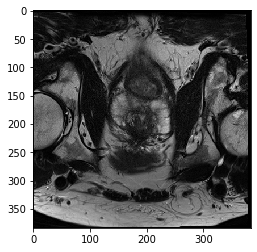

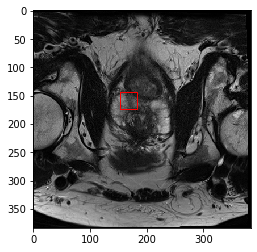

Case 00 Clin Sig :  True Resampled : False 
spacings :  (0.5, 0.5, 3.0)
Arrays shape :  (19, 384, 384)
location of the cancer :  [25.7457, 31.8707, -38.511]
location in voxels :  (167, 159, 8)


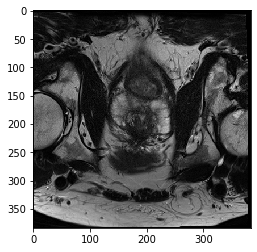

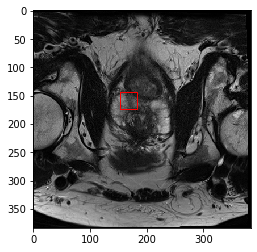

Case 34 Clin Sig :  False Resampled : True 
spacings :  (0.5, 0.5, 3.0)
Arrays shape :  (23, 384, 384)
location of the cancer :  [17.0042, 60.678, 5.75149]
location in voxels :  (203, 146, 15)


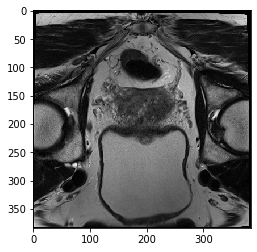

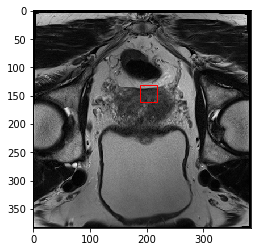

Case 34 Clin Sig :  False Resampled : False 
spacings :  (0.5, 0.5, 3.5)
Arrays shape :  (19, 384, 384)
location of the cancer :  [17.0042, 60.678, 5.75149]
location in voxels :  (203, 146, 13)


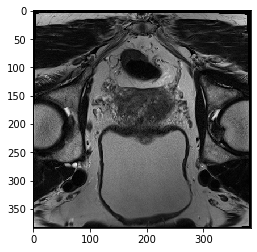

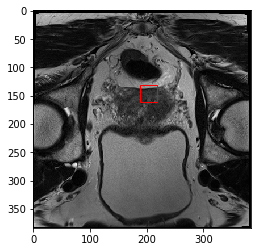

Case 32 Clin Sig :  False Resampled : True 
spacings :  (0.5, 0.5, 3.0)
Arrays shape :  (26, 384, 384)
location of the cancer :  [19.0001, 60.9885, -32.157]
location in voxels :  (230, 143, 20)


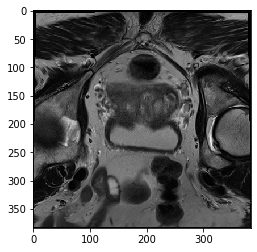

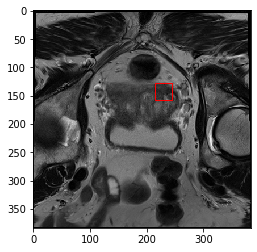

Case 32 Clin Sig :  False Resampled : False 
spacings :  (0.5, 0.5, 4.0)
Arrays shape :  (19, 384, 384)
location of the cancer :  [19.0001, 60.9885, -32.157]
location in voxels :  (230, 143, 15)


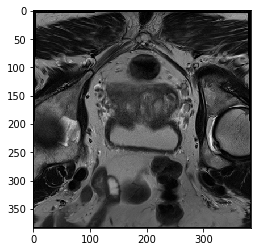

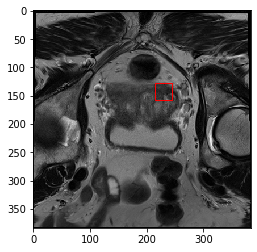

Case 35 Clin Sig :  False Resampled : True 
spacings :  (0.5, 0.5, 3.0)
Arrays shape :  (19, 384, 384)
location of the cancer :  [17.2049, 16.7651, -24.8213]
location in voxels :  (230, 212, 8)


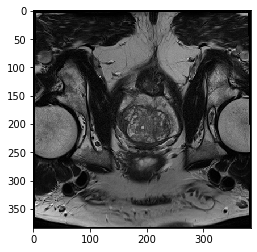

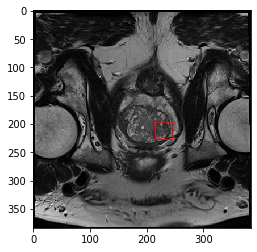

Case 35 Clin Sig :  False Resampled : False 
spacings :  (0.5, 0.5, 3.0)
Arrays shape :  (19, 384, 384)
location of the cancer :  [17.2049, 16.7651, -24.8213]
location in voxels :  (230, 212, 8)


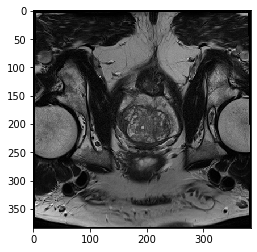

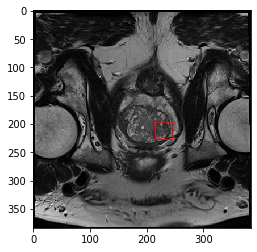

Case 04 Clin Sig :  False Resampled : True 
spacings :  (0.5, 0.5, 3.0)
Arrays shape :  (29, 384, 384)
location of the cancer :  [-7.69665, 3.64226, 23.1659]
location in voxels :  (220, 216, 10)


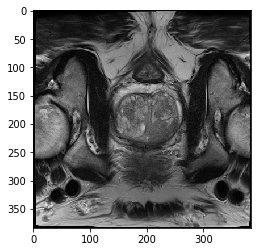

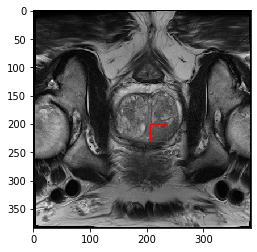

Case 04 Clin Sig :  False Resampled : False 
spacings :  (0.5, 0.5, 4.5)
Arrays shape :  (19, 384, 384)
location of the cancer :  [-7.69665, 3.64226, 23.1659]
location in voxels :  (220, 216, 7)


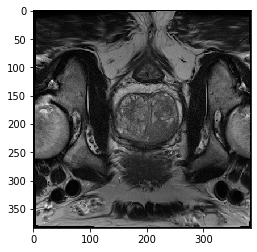

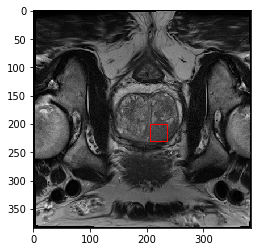

Case 20 Clin Sig :  False Resampled : True 
spacings :  (0.5, 0.5, 3.0)
Arrays shape :  (21, 384, 384)
location of the cancer :  [10.1617, 53.5994, 10.0223]
location in voxels :  (157, 153, 9)


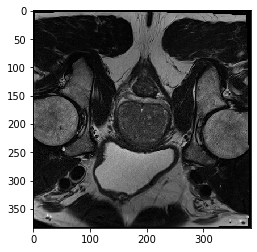

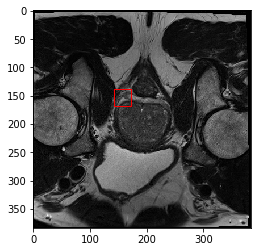

Case 20 Clin Sig :  False Resampled : False 
spacings :  (0.5, 0.5, 3.0)
Arrays shape :  (21, 384, 384)
location of the cancer :  [10.1617, 53.5994, 10.0223]
location in voxels :  (157, 153, 9)


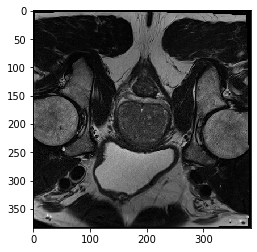

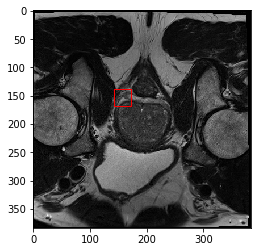

Case 02 Clin Sig :  True Resampled : True 
spacings :  (0.5, 0.5, 3.0)
Arrays shape :  (19, 384, 384)
location of the cancer :  [-27.0102, 41.5467, -26.0469]
location in voxels :  (153, 166, 12)


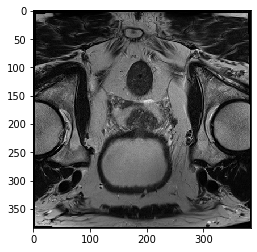

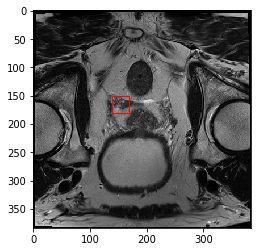

Case 02 Clin Sig :  True Resampled : False 
spacings :  (0.5, 0.5, 3.0)
Arrays shape :  (19, 384, 384)
location of the cancer :  [-27.0102, 41.5467, -26.0469]
location in voxels :  (153, 166, 12)


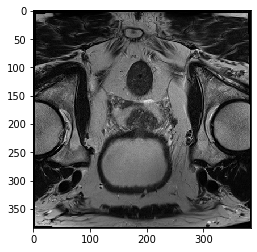

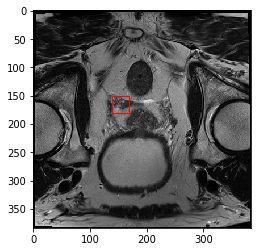

In [76]:
#t2_case_00
#t2_case_34
#t2_case_32
#t2_case_35
#t2_case_04
#t2_case_20
#t2_case_02

print("Case 00", "Clin Sig : ", t2_case_00["ClinSig"] , "Resampled : True ")
dessine(t2_case_00_image, pos00)
print("Case 00", "Clin Sig : ", t2_case_00["ClinSig"] , "Resampled : False ")
dessine(t2_case_00_not_resampled, pos00)

print("Case 34", "Clin Sig : ", t2_case_34["ClinSig"] , "Resampled : True ")
dessine(t2_case_34_image, pos34)
print("Case 34", "Clin Sig : ", t2_case_34["ClinSig"] , "Resampled : False ")
dessine(t2_case_34_not_resampled, pos34)

print("Case 32", "Clin Sig : ", t2_case_32["ClinSig"] , "Resampled : True ")
dessine(t2_case_32_image, pos32)
print("Case 32", "Clin Sig : ", t2_case_32["ClinSig"] , "Resampled : False ")
dessine(t2_case_32_not_resampled, pos32)

print("Case 35", "Clin Sig : ", t2_case_35["ClinSig"] , "Resampled : True ")
dessine(t2_case_35_image, pos35)
print("Case 35", "Clin Sig : ", t2_case_35["ClinSig"] , "Resampled : False ")
dessine(t2_case_35_not_resampled, pos35)

print("Case 04", "Clin Sig : ", t2_case_04["ClinSig"] , "Resampled : True ")
dessine(t2_case_04_image, pos04)
print("Case 04", "Clin Sig : ", t2_case_04["ClinSig"] , "Resampled : False ")
dessine(t2_case_04_not_resampled, pos04)

print("Case 20", "Clin Sig : ", t2_case_20["ClinSig"] , "Resampled : True ")
dessine(t2_case_20_image, pos20)
print("Case 20", "Clin Sig : ", t2_case_20["ClinSig"] , "Resampled : False ")
dessine(t2_case_20_not_resampled, pos20)

print("Case 02", "Clin Sig : ", t2_case_02["ClinSig"] , "Resampled : True ")
dessine(t2_case_02_image, pos02)
print("Case 02", "Clin Sig : ", t2_case_02["ClinSig"] , "Resampled : False ")
dessine(t2_case_02_not_resampled, pos02)


In [96]:
first_sig_case_array = sitk.GetArrayViewFromImage(first_sig_case_image)
first_sig_case_array_not_resampled = sitk.GetArrayViewFromImage(first_sig_case_image_not_resampled)

In [97]:
print(first_sig_case_array.shape)
print(first_sig_case_array_not_resampled.shape)

(21, 384, 384)
(21, 384, 384)


In [98]:
pos = first_sig_case['pos']

In [99]:
pos_1 = pos[1:-1]
converted_pos = pos_1.split(",")
pos = [float(i) for i in converted_pos]
pos

[34.8707, 51.5015, -3.06943]

In [100]:
first_sig_case_cancer_loc = first_sig_case_image.TransformPhysicalPointToIndex(pos)
x = first_sig_case_cancer_loc[0]
y = first_sig_case_cancer_loc[1]
z = first_sig_case_cancer_loc[2]

In [101]:
print("Physical space: ", pos) 


Physical space:  [34.8707, 51.5015, -3.06943]


In [102]:
print("Voxel: ", first_sig_case_cancer_loc) 

Voxel:  (265, 183, 26)


In [103]:
first_sig_case_array[z][x][y]

IndexError: index 26 is out of bounds for axis 0 with size 21

In [104]:
print(first_sig_case_array.shape)


(21, 384, 384)


In [105]:
print(first_sig_case_array.ndim)


3


In [106]:
plt.imshow(first_sig_case_array[z,:,:], cmap = 'gray')


IndexError: index 26 is out of bounds for axis 0 with size 21

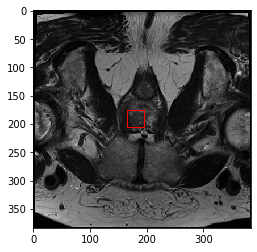

In [32]:
fig,ax = plt.subplots(1)
ax.imshow(first_sig_case_array[z,:,:], cmap = 'gray') 
rect = patches.Rectangle((x-15,y-15),30,30,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()


In [53]:
intensity_voxel = first_sig_case_array[z][x][y]

In [1]:
# GLCM and texture based : 
# In a neighborhood around a central voxel, a GLCM is build
# considering each voxel pair dened by a specic distance and angle. Then, using the
# GLCM, a set of statistical features is computed
# Do that on all your images, and extract statistical featuers!!

# Understand everything on how pyradiomics works, and then implement it here : je comprend pas trop cette histoire de mask,
# but once I understand it deghre khod le code and apply
# question : is the glcm determined on the mask or image?
from __future__ import print_function
import six
import os  # needed navigate the system to get the input data

import radiomics
from radiomics import featureextractor  # This module is used for interaction with pyradiomics
# Get the testCase
imagePath, maskPath = radiomics.getTestCase('brain1')

if imagePath is None or maskPath is None:  # Something went wrong, in this case PyRadiomics will also log an error
    raise Exception('Error getting testcase!')  # Raise exception to prevent cells below from running in case of "run all"

# Additonally, store the location of the example parameter file, stored in \pyradiomics\examples/exampleSettings
paramPath = os.path.join('..', 'examples', 'exampleSettings', 'Params.yaml')
print('Parameter file, absolute path:', os.path.abspath(paramPath))

Parameter file, absolute path: E:/Memoire/ProstateX/codes/ProstateX-master/examples/exampleSettings/Params.yaml


In [2]:
# Instantiate the extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

print('Extraction parameters:\n\t', extractor.settings)
print('Enabled filters:\n\t', extractor.enabledImagetypes)
print('Enabled features:\n\t', extractor.enabledFeatures)

Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}


In [11]:
result = extractor.execute(imagePath, maskPath)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [12]:
result

OrderedDict([('diagnostics_Versions_PyRadiomics', 'v3.0.1'),
             ('diagnostics_Versions_Numpy', '1.19.5'),
             ('diagnostics_Versions_SimpleITK', '1.2.4'),
             ('diagnostics_Versions_PyWavelet', '1.1.1'),
             ('diagnostics_Versions_Python', '3.7.3'),
             ('diagnostics_Configuration_Settings',
              {'minimumROIDimensions': 2,
               'minimumROISize': None,
               'normalize': False,
               'normalizeScale': 1,
               'removeOutliers': None,
               'resampledPixelSpacing': None,
               'interpolator': 'sitkBSpline',
               'preCrop': False,
               'padDistance': 5,
               'distances': [1],
               'force2D': False,
               'force2Ddimension': 0,
               'resegmentRange': None,
               'label': 1,
               'additionalInfo': True}),
             ('diagnostics_Configuration_EnabledImageTypes', {'Original': {}}),
             ('diagno